# 정규 방정식을 사용한 선형 회귀

In [141]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


y = np.array([98,103,103.5,105,109,123,123.5,133.3,133.6,133.9,134,136,138,138.5,141,147,149,153,155,155.5,158,159,162,177, 178])
y=y.reshape(-1,1)

X= np.array([38,38.5,42,42.5,44,50,46,53,52,51,48,49,57,59,53,57,55,56,63,60,62,63,61,67,68])
X=X.reshape(-1,1)

X_b=np.c_[np.ones((len(X),1)), X]


theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[2.82130198],
       [2.52903929]])

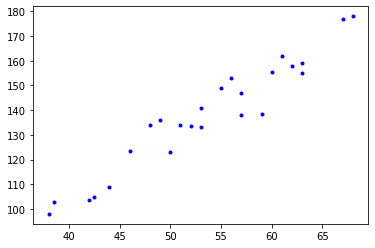

In [142]:
plt.plot(X,y,'b.')

In [143]:
X_new = np.array([[35],[70]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict



array([[ 91.33767709],
       [179.85405219]])

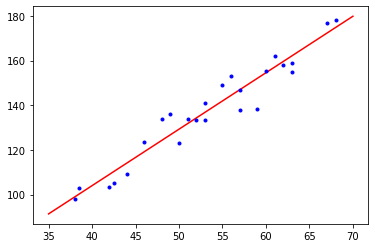

In [144]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")

plt.show()

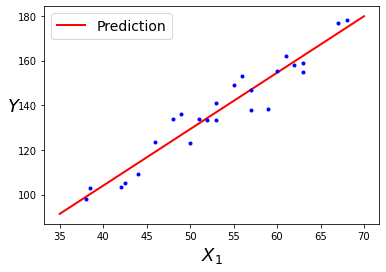

In [145]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label='Prediction')
plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$",rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


plt.show()

In [146]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.82130198]), array([[2.52903929]]))

In [147]:
lin_reg.predict(X_new)

array([[ 91.33767709],
       [179.85405219]])

# 유사 역행렬

In [148]:
#유사 역행렬
import scipy
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-20)
theta_best_svd

array([[2.82130198],
       [2.52903929]])

In [149]:
np.linalg.pinv(X_b).dot(y)

array([[2.82130198],
       [2.52903929]])

# 배치 경사 하강법을 사용한 선형 회귀

In [159]:
eta = 0.0001 
n_iterations = 20000
m = len(X)

theta = np.random.randn(2,1)  
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[0.08077974],
       [2.57913516]])

In [160]:
X_new_b.dot(theta)

array([[ 90.35051052],
       [180.62024129]])

In [161]:
theta_path_bgd=[]

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)

    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    

# 데이터의 학습률과 시험횟수를 임의로 설정함

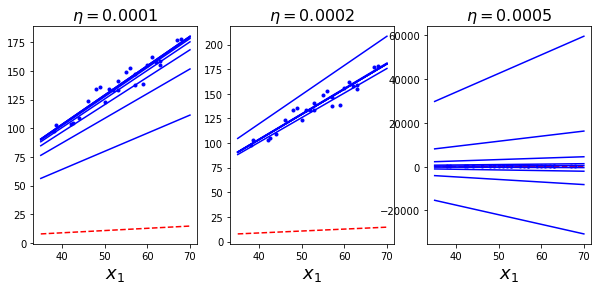

In [163]:
np.random.seed(20)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plot_gradient_descent(theta, eta=0.0001)
plt.subplot(1,3,2); plot_gradient_descent(theta, eta=0.0002, theta_path=theta_path_bgd)
plt.subplot(1,3,3); plot_gradient_descent(theta, eta=0.0005) 

plt.show()

# 확률적 경사하강법

In [164]:
#확률적 경사하강법
theta_path_sgd=[]
m = len(X_b)
np.random.seed(20)

c:\miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in subtract


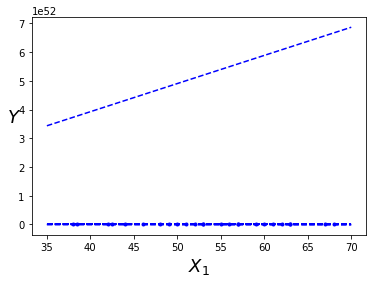

In [165]:

n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i<20:
            y_predict = X_new_b.dot(theta)
            style='b--' if i>0 else 'r--'         
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        
        xi = X_b[random_index:random_index+1]        
        yi = y[random_index:random_index+1]        
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        
        eta=learning_schedule(epoch*m + i)
        theta= theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)

plt.show()

In [166]:
theta

array([[nan],
       [nan]])

In [169]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3, penalty=None, eta0=0.0001, random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.0001, max_iter=10000, penalty=None, random_state=42)

In [170]:
sgd_reg.intercept_, sgd_reg.coef_

(array([0.04850646]), array([2.57856895]))

# 미니배치 경사 하강법


In [171]:
#미니배치 경사 하강법

In [172]:
theta_path_mgd = []

n_iterations=50
minibatch_size= 5

np.random.seed(42)
theta=np.random.randn(2,1)

t0, t1 = 200,1000
def learning_schedule(t):
    return t0/(t+t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indicies=np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indicies]
    y_shuffled = y[shuffled_indicies]
    for i in range(0,m,minibatch_size):
        t +=1
        xi = X_b_shuffled[i:i+minibatch_size] 
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta



c:\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


array([[nan],
       [nan]])

# 결론
정규방정식 선형회귀, Sklearn을 이용한 선형회귀, 유사역행렬들의 theta값은
근사적으로 (2,0)으로 동일

반면, 배치 경사하강법의 theta    : (-1, 0)
      확률적 경사하강법의 theta  : (0.6, 0.3)
      미니배치 경사하강법의 theta: (0.53, 0.37)
      
개인 데이터를 이용해서 선형회귀 분석을 했을 때 특히 경사하강법에서의 학습률과 시험 횟수에 따라 예측 결과가 굉장히 다르게 나왔었습니다. 심지어 error 가 발생하여 결과값을 얻지 못하는 경우도 있었습니다. 
경사하강법에서 학습률, 시험횟수 설정시에 문제가 발생 한 것 같은데, 다른 데이터를 다룰때 그 학습률과 시험횟수 설정법을 어떻게 설정해야하는지 궁금합니다. 

또한 c:\miniconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract 이 메세지의 오류가 도저히 이해가 안됩니다.... 